# Coronavirus Data Analysis

In [1]:
# Data is about cases and deaths in different countries on a daily frequency

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
covid = pd.read_csv("covid_data.csv")
covid.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,12/31/2019,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,1/1/2020,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,1/2/2020,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,1/3/2020,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,1/4/2020,0,0,38928341.0,2.581,1803.987,0.5


In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    23082 non-null  object 
 1   date                        23082 non-null  object 
 2   new_cases                   23082 non-null  int64  
 3   new_deaths                  23082 non-null  int64  
 4   population                  23018 non-null  float64
 5   aged_65_older_percent       20643 non-null  float64
 6   gdp_per_capita              20711 non-null  float64
 7   hospital_beds_per_thousand  19144 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


In [6]:
# CHECK
abc = covid['location'].value_counts() #Thankful to this command as it returns sorted results!
abc.values
#np.unique(abc.values, return_counts=True)
len(np.unique(abc.values)) #=57
#plt.scatter(range(len(abc)), abc.values) # Scatter requires x-axis values unlike plot function

#abc[200:]

# ROUGH
#whitespace_check = covid['location'] != covid['location'].str.strip()
#covid[whitespace_check]

57

In [7]:
locations = covid['location'].unique()
len(locations)

212

In [8]:
# Data type conversion
covid['location'] = covid['location'].astype(str) # unsuccessful
covid['date'] = pd.to_datetime(covid['date'], format='%m/%d/%Y') # using the 'to_datetime' function
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    23082 non-null  object        
 1   date                        23082 non-null  datetime64[ns]
 2   new_cases                   23082 non-null  int64         
 3   new_deaths                  23082 non-null  int64         
 4   population                  23018 non-null  float64       
 5   aged_65_older_percent       20643 non-null  float64       
 6   gdp_per_capita              20711 non-null  float64       
 7   hospital_beds_per_thousand  19144 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 1.4+ MB


In [9]:
# CHECK
#covid[covid['location']=='Afghanistan']

In [10]:
# OBSERVATION
covid.isnull().sum()   # 4 columns contain null values
#sns.heatmap(covid.isnull(), cbar = False)

location                         0
date                             0
new_cases                        0
new_deaths                       0
population                      64
aged_65_older_percent         2439
gdp_per_capita                2371
hospital_beds_per_thousand    3938
dtype: int64

In [11]:
covid.dropna().info() # (~5k entries will be dropped after removing null values)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18328 entries, 0 to 23017
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    18328 non-null  object        
 1   date                        18328 non-null  datetime64[ns]
 2   new_cases                   18328 non-null  int64         
 3   new_deaths                  18328 non-null  int64         
 4   population                  18328 non-null  float64       
 5   aged_65_older_percent       18328 non-null  float64       
 6   gdp_per_capita              18328 non-null  float64       
 7   hospital_beds_per_thousand  18328 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 1.3+ MB


#### QUERIES:
    1. Find out which countries contain Null values?     DONE
    2. Shall I find out the patterns of Null values in each location?
    3. What is the difference between World and International?
    4. Find out the number of entries for each location.     DONE
    5. Find out if which locations have repeated dates?      DONE
    6. Find out the range of dates (first and last date) for each location.     DONE
    7. Find out that there is only one unique value in each of the last four columns in each country's data.

In [12]:
# CHECK
#covid.isnull().sum()
# Rows containing Null values
null_rows = covid[covid.isnull().any(axis=1)]
# Count of rows containing Null values
len(null_rows) #=4754  # Correct! Success!
len(covid['location'].unique()) # The count of locations is 212
null_locs = null_rows['location'].unique()
print(null_locs)
#len(null_locs) # The count of locations having null values is 55

['Andorra' 'Angola' 'Anguilla' 'Aruba' 'Bermuda'
 'Bonaire Sint Eustatius and Saba' 'British Virgin Islands'
 'Cayman Islands' 'Chad' 'Congo' "Cote d'Ivoire" 'Cuba' 'Curacao'
 'Democratic Republic of Congo' 'Dominica' 'Faeroe Islands'
 'Falkland Islands' 'French Polynesia' 'Gibraltar' 'Greenland' 'Guam'
 'Guernsey' 'Guinea-Bissau' 'Hong Kong' 'Isle of Man' 'Jersey' 'Kosovo'
 'Lesotho' 'Liechtenstein' 'Maldives' 'Mauritania' 'Monaco' 'Montserrat'
 'Namibia' 'New Caledonia' 'Nigeria' 'Northern Mariana Islands'
 'Palestine' 'Papua New Guinea' 'Puerto Rico' 'Rwanda'
 'Saint Kitts and Nevis' 'San Marino' 'Senegal' 'Sierra Leone'
 'Sint Maarten (Dutch part)' 'Somalia' 'South Sudan' 'Syria' 'Taiwan'
 'Turks and Caicos Islands' 'United States Virgin Islands' 'Vatican'
 'Western Sahara' 'International']


In [13]:
# CHECK
# I have found out the number of entries for each location as abc.values or a plot far above.

In [14]:
# GOALS:
# - Dates should be in order and should not repeat

In [15]:
# CHECK
# Which locations have all the rows containing Null values
for loc in null_locs:
    df1 = covid[covid['location'] == loc]
    df2 = null_rows[null_rows['location'] == loc]
    if df1.equals(df2) == False:
        print(loc, df1.equals(df2)) 
    # No output means no locations have less than 100% rows containing Null values.

In [16]:
# CHECK
start_dates, end_dates = [], []
for loc in locations:
    series1 = covid['date'][covid['location'] == loc]
    if series1.duplicated().any() == True:
        print(loc, 'contains duplicated dates')
        # No output means none of the locations contain duplicated dates
    #print(series1.iloc[0], '     ', series1.iloc[-1])
    start_dates.append(series1.iloc[0])
    end_dates.append(series1.iloc[-1])

In [17]:
# CHECK
# covid['date'][covid['location'] == 'Andorra']
#series1.iloc[-1]
series1.iloc[0]  # pandas._libs.tslibs.timestamps.Timestamp
#type(series1.iloc[0].to_pydatetime().date()) # datetime.date
start_dates = np.array(start_dates) # Conversion because the unique function doesn't applies on list
end_dates = np.array(end_dates)

e1, e2 = np.unique(end_dates, return_counts=True)
s1, s2 = np.unique(start_dates, return_counts=True)
print('Unique Start dates:')
for value, count in zip(s1, s2):
    print(f"{value}, Count: {count}")
#print('\nUnique End dates:', e1, e2, sep='\n')

Unique Start dates:
2019-12-31 00:00:00, Count: 68
2020-01-31 00:00:00, Count: 1
2020-02-07 00:00:00, Count: 2
2020-02-26 00:00:00, Count: 1
2020-02-29 00:00:00, Count: 1
2020-03-01 00:00:00, Count: 1
2020-03-02 00:00:00, Count: 1
2020-03-03 00:00:00, Count: 6
2020-03-04 00:00:00, Count: 6
2020-03-05 00:00:00, Count: 3
2020-03-06 00:00:00, Count: 4
2020-03-07 00:00:00, Count: 7
2020-03-08 00:00:00, Count: 3
2020-03-09 00:00:00, Count: 2
2020-03-10 00:00:00, Count: 3
2020-03-11 00:00:00, Count: 2
2020-03-12 00:00:00, Count: 6
2020-03-13 00:00:00, Count: 8
2020-03-14 00:00:00, Count: 3
2020-03-15 00:00:00, Count: 12
2020-03-16 00:00:00, Count: 5
2020-03-17 00:00:00, Count: 5
2020-03-18 00:00:00, Count: 3
2020-03-19 00:00:00, Count: 7
2020-03-20 00:00:00, Count: 11
2020-03-21 00:00:00, Count: 8
2020-03-22 00:00:00, Count: 4
2020-03-23 00:00:00, Count: 4
2020-03-24 00:00:00, Count: 2
2020-03-25 00:00:00, Count: 3
2020-03-26 00:00:00, Count: 2
2020-03-27 00:00:00, Count: 3
2020-03-28 00:00:

In [18]:
# CHECK
len(s1) #=45
#len(np.unique(abc.values)) #=57
# We observe a significant difference between the count of unique location entries and the count of unique start dates.

45

In [19]:
locs1, locs2 = [], []

In [20]:
# CHECK
i,j=0,0

for loc in locations:
    series1 = covid['hospital_beds_per_thousand'][covid['location'] == loc]
    if np.isnan(series1).any():
        i+=1
        # print(loc, series1.unique())     # Uncomment this to check
        locs1.append(loc)
    if len(series1.unique()) != 1:
        j+=1
        print(loc, series1.unique())
print(i,j)
#print(locs1, '\n', locs2)

47 0


In [21]:
# ROUGH
abc = np.array([1,2,3,np.nan,2,5,6,3])
np.isnan(abc).any(), np.unique(abc)
#len(series1) # all 64 null values in the population column belongs to "International" location

(True, array([ 1.,  2.,  3.,  5.,  6., nan]))

In [22]:
# OBSERVATIONS:

# Single unique values in Population.
# Single unique values in aged_65_older_percent.
# Single unique values in gdp_per_capita.
# Single unique values in hospital_beds_per_thousand.


# Only "International" location has all Null population values.
# 28 locations have all Null "aged_65_older_percent" values.
# 28 locations have all Null "gdp_per_capita" values.
    # All of these 28 locations are not same between "aged_65_older_percent" and "gdp_per_capita"
# 47 locations have all Null "hospital_beds_per_thousand" values.

In [23]:
# CHECK
symm_diff = list(set(locs1) ^ set(locs2)) # Symmetric difference
#list(set(locs1) & set(symm_diff)) # Intersection1
#list(set(locs2) & set(symm_diff)) # Intersection2

In [24]:
#1. As there only a single unique value for each location in the last four columns, 
#we can easily simplify the last four columns
#2. The loc_info dataframe will have the location column (as a key) and the last four columns.

In [25]:
covid_base = covid[['location', 'date', 'new_cases', 'new_deaths']]  # Me: use double brackets for multiple columns
covid_base.head()

,location,date,new_cases,new_deaths
0,Afghanistan,2019-12-31,0,0
1,Afghanistan,2020-01-01,0,0
2,Afghanistan,2020-01-02,0,0
3,Afghanistan,2020-01-03,0,0
4,Afghanistan,2020-01-04,0,0


In [26]:
#covid_base.isnull().sum()
#covid.shape #(23082, 8)

In [27]:
loc_info_raw = pd.DataFrame(columns = covid.columns)
loc_info_raw

for loc in locations:
    series1 = covid['location'][covid['location'] == loc]
    #print(series1.index[0]) # just for testing
    loc_info_raw = loc_info_raw.append(covid.loc[series1.index[0]], ignore_index=True)
    
#series1 = covid['location'][covid['location'] == 'Pakistan'] #rough
loc_info_raw

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,3.892834e+07,2.581,1803.987,0.500
1,Albania,2020-03-09,2,0,2.877800e+06,13.188,11803.431,2.890
2,Algeria,2019-12-31,0,0,4.385104e+07,6.211,13913.839,1.900
3,Andorra,2020-03-03,1,0,7.726500e+04,NaN,NaN,NaN
4,Angola,2020-03-22,2,0,3.286627e+07,2.405,5819.495,NaN
...,...,...,...,...,...,...,...,...
207,Yemen,2020-04-10,1,0,2.982597e+07,2.922,1479.147,0.700
208,Zambia,2020-03-19,2,0,1.838396e+07,2.480,3689.251,2.000
209,Zimbabwe,2020-03-21,1,0,1.486293e+07,2.822,1899.775,1.700
210,World,2019-12-31,27,0,7.794799e+09,8.696,15469.207,2.705


In [28]:
# ROUGH
#covid.columns
#covid.loc[0]

In [29]:
loc_info = loc_info_raw.iloc[:, [0, -4, -3, -2, -1]]
loc_info

,location,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,3.892834e+07,2.581,1803.987,0.500
1,Albania,2.877800e+06,13.188,11803.431,2.890
2,Algeria,4.385104e+07,6.211,13913.839,1.900
3,Andorra,7.726500e+04,NaN,NaN,NaN
4,Angola,3.286627e+07,2.405,5819.495,NaN
...,...,...,...,...,...
207,Yemen,2.982597e+07,2.922,1479.147,0.700
208,Zambia,1.838396e+07,2.480,3689.251,2.000
209,Zimbabwe,1.486293e+07,2.822,1899.775,1.700
210,World,7.794799e+09,8.696,15469.207,2.705


#### Now we have three important dataframes:
1. covid
2. covid_base
3. loc_info (location is the key)

In [30]:
covid_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   location    23082 non-null  object        
 1   date        23082 non-null  datetime64[ns]
 2   new_cases   23082 non-null  int64         
 3   new_deaths  23082 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 721.4+ KB


In [31]:
loc_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    212 non-null    object 
 1   population                  211 non-null    float64
 2   aged_65_older_percent       184 non-null    float64
 3   gdp_per_capita              184 non-null    float64
 4   hospital_beds_per_thousand  165 non-null    float64
dtypes: float64(4), object(1)
memory usage: 8.4+ KB


In [32]:
# CHECK
#loc_info[loc_info['population'].isnull()]

In [33]:
# ROUGH:
# SOlve this problem: Why "International has come two times?" # No problem now

In [34]:
# OBSERVATION:
# datatypes are ok.

# 1 null value in population
# 28, 28 null values in aged_65_older_percent and gdp_per_capita
# 47 null values in hospital_beds_per_thousand

In [35]:
loc_info.describe()

,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
count,2.110000e+02,184.000000,184.000000,165.000000
mean,7.370985e+07,8.847957,19464.082478,3.010806
std,5.526716e+08,6.196086,19768.790977,2.457507
min,8.090000e+02,1.144000,661.240000,0.100000
25%,1.074083e+06,3.459750,4522.973000,1.300000
50%,6.948445e+06,6.736500,13183.081500,2.397000
75%,2.646207e+07,14.341750,28143.439750,3.861000
max,7.794799e+09,27.049000,116935.600000,13.800000


### Sort Values

In [36]:
#loc_info.sort_values(by = ['population'], ascending = False).head(20)
#loc_info.sort_values(by = ['aged_65_older_percent'], ascending = False)[:-27].tail(10) # sliced because NaN values are not required.
#loc_info.sort_values(by = ['gdp_per_capita'], ascending = False)[:-27].head()

In [37]:
# Top 5 records with the highest deaths and cases.
covid_base_no_world = covid_base[covid_base['location'] != 'World']
#covid_base_no_world.sort_values(by = ['new_cases'], ascending = False).head(50)
#covid_base_no_world.sort_values(by = ['new_deaths'], ascending = False).head(50)

# There are around 14 negative values in new_cases and 2 in new_deaths
# United States has the highest record of deaths on 16/Apr/2020 i.e. 4928
# United States has the highest record of cases on 26/Apr/2020 i.e. 48529

In [38]:
covid_no_world = covid[covid['location'] != 'World']

### Data distribution plot

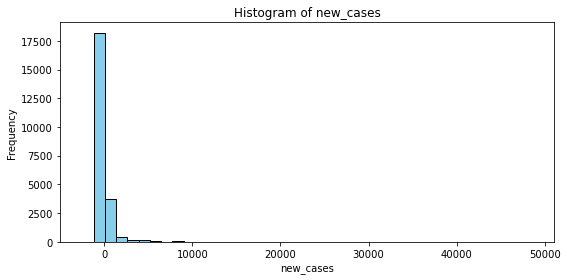

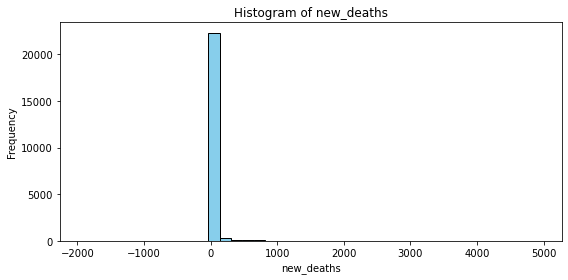

In [39]:
columns_to_plot = ['new_cases', 'new_deaths']

# Plot histograms and density plots for selected columns
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))
    # Histogram - NOTE: using the covid data excluding the 'world' location
    plt.hist(covid_no_world[column], bins=40, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    #plt.show()
    #display(plt.gcf()) # To view one plot at a time


# Omit "World" data. No need to omit "international"
    
    
'''
    # Density plot (Kernel Density Estimate - KDE)
    plt.subplot(1, 2, 2)
    cardio_full[column].plot(kind='density', color='orange')
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
'''
pass

In [40]:
loc_info_no_world = loc_info[loc_info['location'] != 'World']

F:\Anaconda\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
F:\Anaconda\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


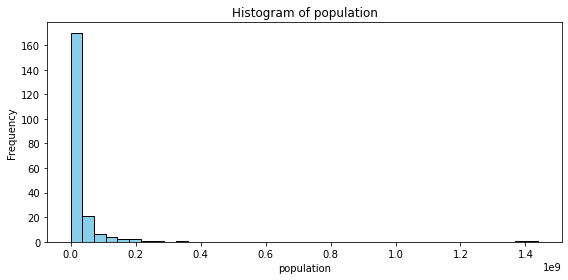

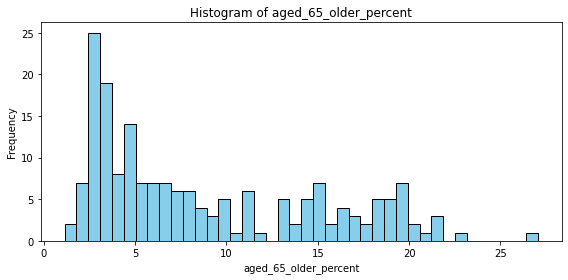

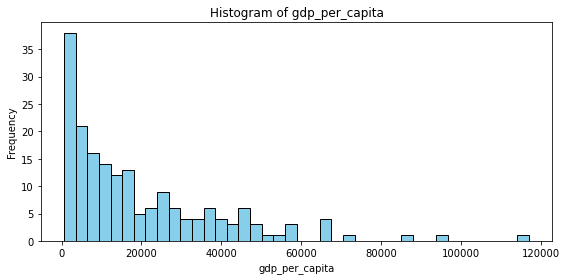

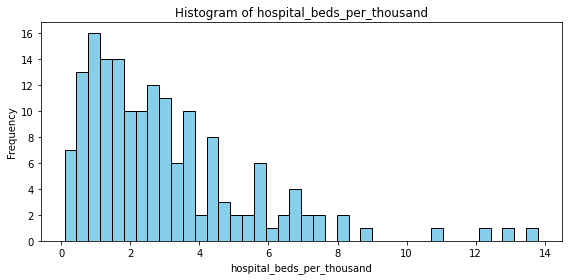

In [41]:
columns_to_plot = ['population', 'aged_65_older_percent', 'gdp_per_capita', 'hospital_beds_per_thousand']

# Plot histograms and density plots for selected columns
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))
    # Histogram - NOTE: using the loc_info data excluding the 'world' location
    plt.hist(loc_info_no_world[column], bins=40, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    
# Extra NOTE: We can include 'World' for gdp_per_capita
pass

In [42]:
# OBSERVATION:
# Most of the countries (more than 160 out of 212) have low population
# There are many countries with a high percentage of higher % of aged 65.
# Most of the countries have very low GDP per capita. (This is shocking!)
#Those having the highest (which are few of them), have a huge difference with the others. 
# Very few countries have more than "8 beds" per thousand people.

In [43]:
# Got two new dataframes i.e. covid_no_world and loc_info_no_world
# Me: no need to create density plot.
# We can just check which locations have zero total cases and deaths in the range of given period.

grouped_data = covid_base.groupby(['location']) # This is a kind of hierarchy
cases_sum = grouped_data['new_cases'].sum()
#cases_sum[cases_sum == 0] #= Only one location i.e. "Hong Kong"

deaths_sum = grouped_data['new_deaths'].sum()
#deaths_sum[deaths_sum == 0] #= len=28 countries

In [44]:
#covid_base[covid_base['location'] == 'Hong Kong'] # The date range is from 2020-01-31 till 2020-06-01

### Correlation matrix 1

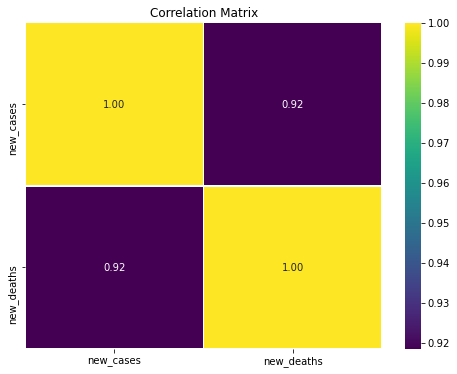

In [45]:
# Correlation plot
# I want to plot 3 kinds of correlation plots

correlation_matrix = covid_base.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [46]:
# OBSERVATION:
# There is a 92% correlation between new_cases and new_deaths.
# Correlation is not found for object and datetime based features.
#covid_base.info()

Timestamp('2020-02-20 21:03:23.773584896')

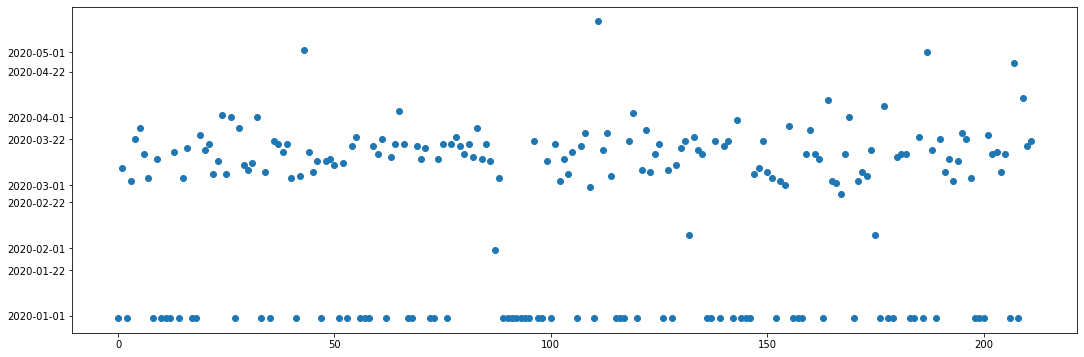

In [47]:
covid_base.head()
date_minmax = covid_base.groupby('location')['date'].agg(['min', 'max'])
plt.figure(figsize=(18, 6))
plt.scatter(range(len(date_minmax)), date_minmax['min'])  # observe 'max' also
# Open plot in a new tab

date_minmax['min'].mean() # 2020-02-20
# I want to go with 2020-03-03 or 2020-03-04

In [49]:
# ROUGH

early_locs = []
for loc in locations:
    series4 = covid_base['date'][covid_base['location'] == loc]
    if series4.isin(['2019-12-31']).any():
        #early_locs.append(loc)
        #print(len(series4))
        if series4.isin(['2020-03-04']).any():
            early_locs.append(loc)

len(early_locs)

48

In [51]:
# INFO:
# The 'date' has some missing values based on many locations
# THEREFORE, I can't find the matching columns

### Correlation matrix 2

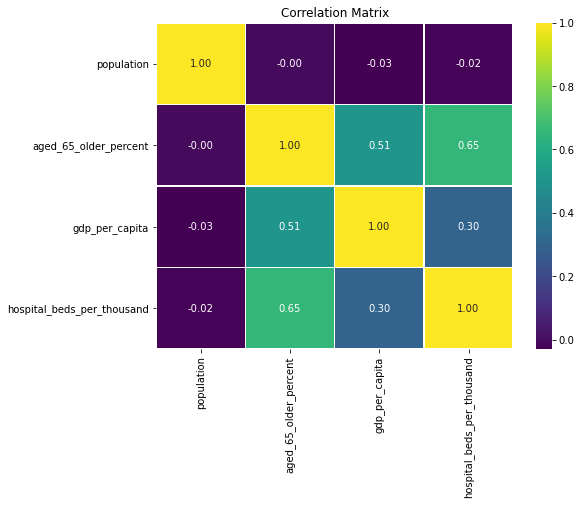

In [52]:
# Correlation plot
correlation_matrix = loc_info.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

OBSERVATION:  
1. 65% correlation between aged_65_older and hospital_beds
2. 51% corr between gdp and aged_65_older
3. 30% corr between gdp and hospital_beds

### PLAN
Split the dataset  
Clean the dataset  
Describe  
Value counts and unique [useless]  
Histogram plot  
Correlation plot  
Other visualizations

#### PLAN:
We can find a lot of insights between the dates, cases, and the deaths. 

#### PLAN:
1. Compare the total cases and deaths between different locations - DONE
2. What are the top five countries that experienced the highest growth in Corona cases and deaths per capita? - DONE
3. Find how many locations have dates of daily frequency - DONE
4. Aggregate the data based on months - DONE
5. Draw pairplot between those columns which have high correlations  
6. Find missing dates for any not_daily_freq_locs location - DONE
7. Find the record for highest deaths/cases per day. - DONE
8. We can check wrong values:  
8a. Those values in which there is a big change from a value to zero.  
9. Check which countries have the highest amount of missing dates?

### PLAN
Bar plot  
Groupby plot  
Pivot table plot  
Pairplot  

In [53]:
# Idea: We can do aggregation of dates by adding the missing dates if needed.

In [54]:
# How many locations have no missing values in the daily records:
is_daily_frequency = np.array([])
not_daily_freq_locs = []
for loc in locations:
    df3 = covid_base[covid_base['location'] == loc]
    #df3['date'] = pd.to_datetime(df['date_column'])
    frequency = pd.infer_freq(df3['date'])
    is_daily_frequency = np.append(is_daily_frequency, frequency == 'D')
    if frequency != 'D':
        not_daily_freq_locs.append(loc)
    
np.unique(is_daily_frequency, return_counts = True)
#not_daily_freq_locs

#covid_base['date'][covid_base['location'] == 'Afghanistan'][:50]

(array([0., 1.]), array([ 76, 136], dtype=int64))

In [55]:
# OBSERVATION:
# 136 locations(64%) out of 212 have the date on a daily frequency

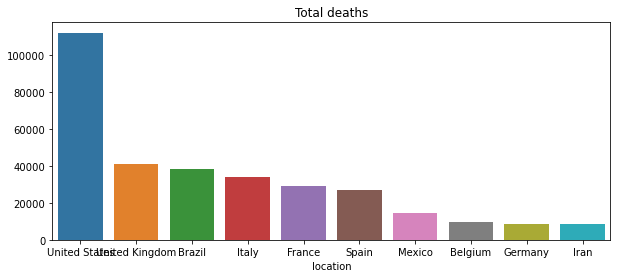

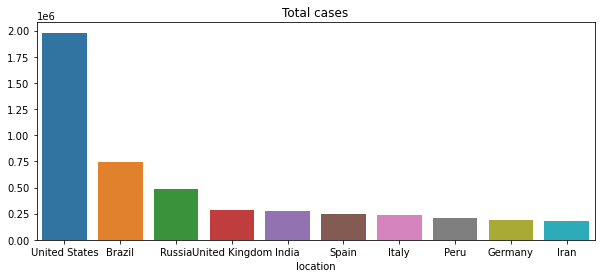

In [56]:
# Find total cases and total deaths for each location
    
covid_base_sum = covid_base.groupby('location').sum()
sort1 = covid_base_sum['new_deaths'].sort_values(ascending = False).head(11) # Sorted output 1
sort2 = covid_base_sum['new_cases'].sort_values(ascending = False).head(11) # Sorted output 2
sort1 = sort1.drop(sort1.index[0])
sort2 = sort2.drop(sort2.index[0])
ratio_d = covid_base_sum['new_cases'].loc[sort1.index]
ratio_d = sort1/ratio_d # Success!
ratio_c = covid_base_sum['new_deaths'].loc[sort2.index]
ratio_c = ratio_c/sort2

#display(sort1, sort2) # display is better than print
#display(ratio_d)

plt.figure(figsize=(10, 4)); plt.title('Total deaths')
sns.barplot(x=sort1.index, y=sort1.values) # :) # barplot doesn't sorts automatically.
plt.figure(figsize=(10, 4)); plt.title('Total cases')
sns.barplot(x=sort2.index, y=sort2.values)
#sort1.plot(kind='bar') # Matplotlib plot is not colorful :(

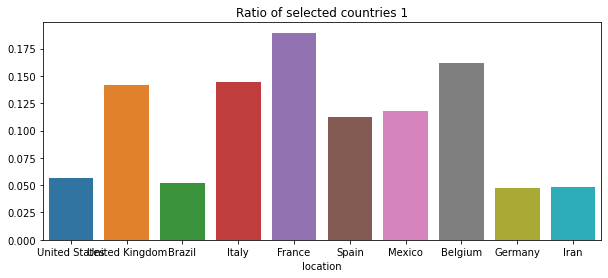

In [57]:
plt.figure(figsize=(10, 4)); plt.title('Ratio of selected countries 1')
sns.barplot(x=ratio_d.index, y=ratio_d.values)
#plt.figure(figsize=(10, 4)); plt.title('Ratio of selected countries 2')
#sns.barplot(x=ratio_c.index, y=ratio_c.values)

In [58]:
# OBSERVATIONS:
# Plot the deaths to cases ratio and compare it with the top countries for highest deaths and highest cases - DONE

# Russia has the lowest ratio and it comes 3rd in total cases. Amazing! Russia is followed by India and Peru.
# France has the highest ratio and it comes 5th in total deaths. France is followed by Belgium, Italy, and United Kingdom.
# U.K and France also has high deaths

# The reasons of low ratio in Russia and India maybe that Russia has low population and India has more youth (not sure about India's reason).
# Italy has 23% (2nd highest), France has 20% (11th highest), U.K has 18.5% (24th highest)

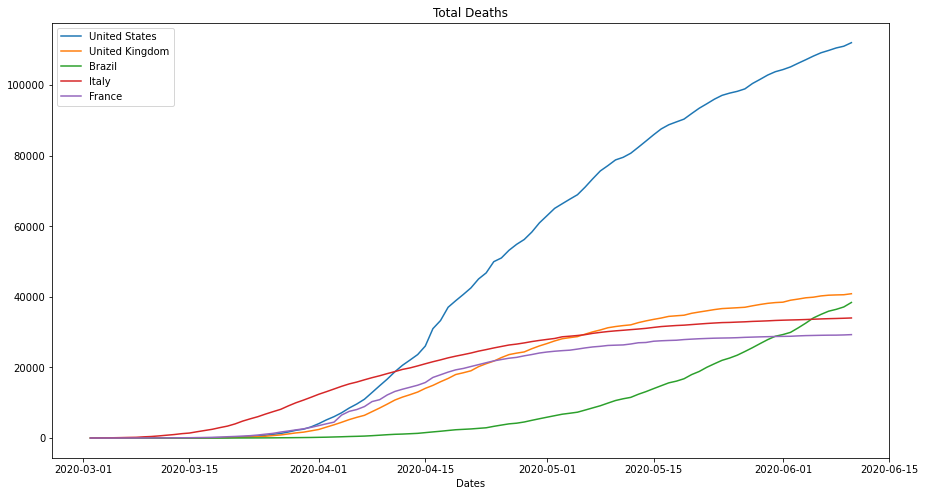

In [59]:
# Let's plot the death graph for top 5 countries and see/compare the critical dates.
top_countries = ['United States', 'United Kingdom', 'Brazil', 'Italy', 'France']

plt.figure(figsize=(15, 8))
for loc in top_countries:
    df4 = covid_base[covid_base['location'] == loc]
    df4 = df4[df4['date'] > '2020-03']
    plt.plot(df4['date'], df4['new_deaths'].cumsum(), label=loc)
    
plt.xlabel('Dates')
#plt.ylabel('Total Deaths')
plt.title('Total Deaths')
plt.legend()

In [60]:
# OBSERVATIONS:
#1. The leading country with the highest count of deaths is Italy.
#2. United States had the highest growth as compared to other countries from April-2020. Brazil follows.
#3. The deaths in Italy and France is under control near the end date.
#4. Brazil's deaths is the quickest near the end date. Brazil had the least deaths in the beginning.

In [61]:
# CHECK
# Does the top 5 countries have continous dates?

#top_countries in not_daily_freq_locs  # OMIT
#[element in not_daily_freq_locs for element in top_countries]
# ANS: NO

In [62]:
# Resample the data of each location 
#covid_base
#not_daily_freq_locs
#covid_base.resample('M', on='date').sum() # for all locations
Afg = covid_base[covid_base['location'] == 'Afghanistan']
Afg.resample('M', on='date').sum()

,new_cases,new_deaths
date,,
2019-12-31,0,0
2020-01-31,0,0
2020-02-29,1,0
2020-03-31,140,4
2020-04-30,1808,56
2020-05-31,12576,189
2020-06-30,6934,135


In [64]:
# Barplot IDEA:
# We can plot the total deaths and cases of any particular month between different location.

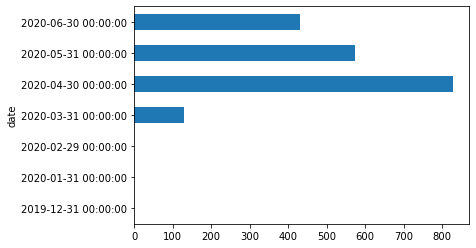

In [65]:
# Plot horizontal barplots of mean of top5 countries acc. to deaths per month
covid_base_top5 = covid_base[covid_base['location'].isin(top_countries)]
top5_resampled = covid_base_top5.resample('M', on='date').mean()
#top5_resampled
top5_resampled['new_deaths'].plot(kind = 'barh', width = 0.5)  # You can also plot the whole dataframe for multi-feature plot

In [66]:
# Why I didn't plot the bar plot directly from the dataframe like in practice1.

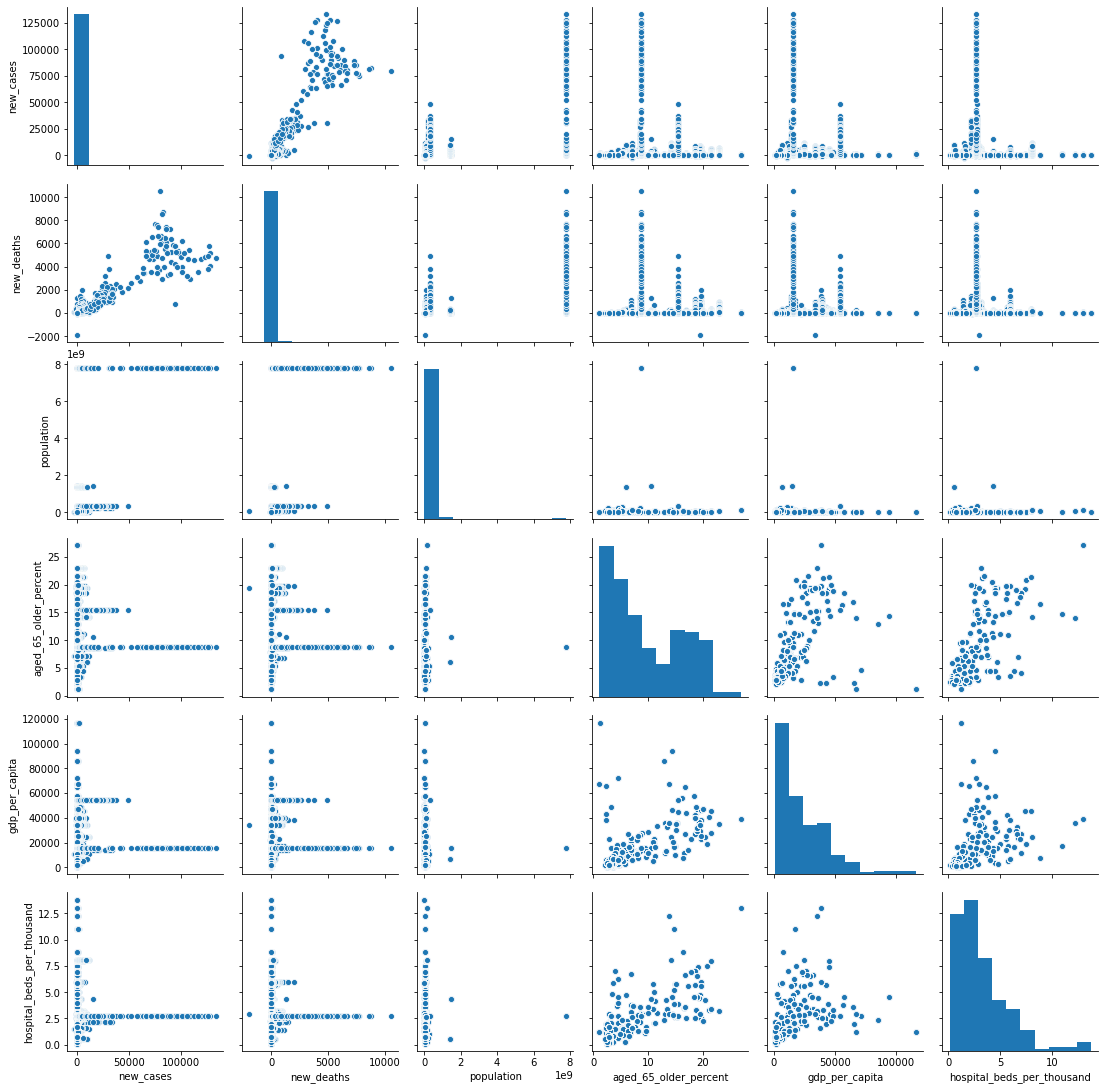

In [67]:
# As we know that:
#92% correlation between new_cases and new_deaths.
#65% correlation between aged_65_older and hospital_beds
#51% corr between gdp and aged_65_older
#30% corr between gdp and hospital_beds

covid.head()
sns.pairplot(covid)

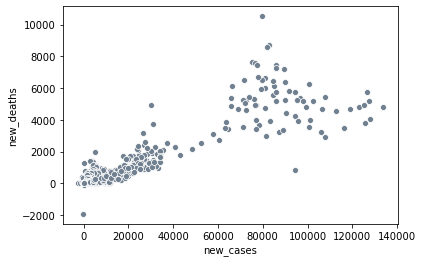

In [68]:
#sns.pairplot(covid_base, vars=['new_cases', 'new_deaths'])
sns.scatterplot(data=covid_base[['new_cases', 'new_deaths']], x="new_cases", y="new_deaths", color='SlateGray')

In [69]:
# The data contains 212 countries, World, and International as locations.
display(covid)

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5
...,...,...,...,...,...,...,...,...
23077,International,2020-02-28,0,0,NaN,NaN,NaN,NaN
23078,International,2020-02-29,0,2,NaN,NaN,NaN,NaN
23079,International,2020-03-01,0,0,NaN,NaN,NaN,NaN
23080,International,2020-03-02,0,0,NaN,NaN,NaN,NaN


In [3]:
# Death Rate
'''
deaths_sum = grouped_data['new_deaths'].sum() #.sort_values(by='new_deaths')
loc_info2 = loc_info.set_index('location')
loc_info2['population'] #.isna().value_counts() # Only 01 null value at International
pop_series_mill = loc_info2['population']/1000000
pop_series_mill

plt.figure(figsize=(10, 5))
death_rate = deaths_sum/pop_series_mill
death_rate #.isna().value_counts() # Only 01 null value
death_rate = death_rate.sort_values(ascending=False)
#sns.barplot(x = death_rate.head(10).index, y=death_rate.head(10))
'''
pass

#### OBSERVATIONS:

The dataset contains the following insights/problems:
1. There are 212 countries.
1. A lot of Null values.  
2. "International" and a quarter countries have null values. Those countries are remote and have low popularity.
3. If a row contain Null values, then all rows of the corresponding location will have Null values.  
Sol.: Drop the rows containing Null values.
4. Number of entries for each location are not the same.
5. The last four columns have repeated values for each country.  
Sol.: We need to seperate these columns to a new dataframe.
6. No duplicate values found in the Date column
7. 45 unique values in the start date. Majority = 2019-12-31
7. 4 unique values in the end date. (It has a clear single majority "2020-06-10", where others are negligible)
8. We observe a significant difference between the count of unique location entries and the count of unique start dates.
9. Single unique values for each location in last four columns.
10. See the observations about the data distribution below its plot.
11. Only Hong Kong has 0 total cases in its date range.
11. 28 countries have 0 total cases in their data ranges.
12. 136 locations(64%) out of 212 have the date on a daily frequency
13. Russia has the lowest ratio and it comes 3rd in total cases. Amazing! Russia is followed by India and Peru.  
13. France has the highest ratio and it comes 5th in total deaths. France is followed by Belgium, Italy, and United Kingdom.  
13. U.K and France also has high deaths  
13. The reasons of low ratio in Russia and India maybe that Russia has low population and India has more youth (not sure about India's reason).  
13. Italy has 23% (2nd highest), France has 20% (11th highest), U.K has 18.5% (24th highest)  
14. The leading country with the highest count of deaths is Italy.
14. United States had the highest growth as compared to other countries from April-2020. Brazil follows.
14. The deaths in Italy and France is under control near the end date.
14. Brazil's deaths is the quickest near the end date. Brazil had the least deaths in the beginning.
15. There are around 14 negative values in new_cases and 2 in new_deaths
15. United States has the highest record of deaths on 16/Apr/2020 i.e. 4928
15. United States has the highest record of cases on 26/Apr/2020 i.e. 48529

# THE END